## 목적
- 우리가 다루는 데이터는 대부분 unbalanced class classification problem
- 그러면 이때 training시에 label ratio를 다르게 함에 따라서 모델의 성능이 달라지는가?

## 설계
- training 시 label ratio를 다르게 해서 모델 학습
    - 그대로(약 2%), 10%(1:9), 20%(8:2), 50%(5:5) 
    - 현재는 label이 0인 데이터를 down-sampling 해서 비율을 맞춤
    - 때문에 각 sample 별 데이터 사이즈는 다름
- 동일한 월에 대해서 테스트

## modeling
- model: lightgbm
- train: 1월
- test: 3월
- evaluation metric: auprc

### package

In [1]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

import pandas as pd
import numpy as np
import pickle
import time
import shap
import os
import gc

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import shap
shap.initjs()

from sm_utils import sampling, evaluate, save_model, load_model
from sm_utils import make_train_data,  make_test_data, df_to_md_table

/home/dmig/py_libs/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
DATA_PATH = '/home/dmig/work/upsell/data'
MODEL_PATH = '/home/dmig/work/upsell/model'

In [3]:
RESULT_PATH = '/home/dmig/work/upsell/result/sampling_ratio/'

### load data

In [4]:
df_mart01 = pd.read_pickle(os.path.join(DATA_PATH, 'df_mart_201901.pkl'))
df_mart03 = pd.read_pickle(os.path.join(DATA_PATH, 'df_mart_201903.pkl'))

df_mart01.shape, df_mart03.shape

((18176215, 81), (18580984, 81))

In [5]:
total_feature = list(df_mart01.columns)
feature_cols = [c for c in total_feature if c not in ['svc_mgmt_num', 'label']]

### modeling

In [17]:
# best parameters
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': True,
    'num_leaves': 64,
#     'lambda_l1': 25,
#     'lambda_l2': 100,
    'learning_rate': 0.05,
    'num_threads': 20,
}

In [7]:
sample_ratio_list = [None, 0.1, 0.2, 0.5]

In [8]:
result = make_test_data(df_mart03)
idx = result['idx']
x_test = result['x']
y_test = result['y']

ratio: None
make_train_data +++
label_ratio: None
make_data_for_modeling---
x_trn:  (14540972, 79)
x_val:  (3635243, 79)
Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.908139	valid_1's auc: 0.906605
[100]	training's auc: 0.924598	valid_1's auc: 0.92313
[150]	training's auc: 0.933833	valid_1's auc: 0.932351
[200]	training's auc: 0.940467	valid_1's auc: 0.938954
[250]	training's auc: 0.944614	valid_1's auc: 0.94296
[300]	training's auc: 0.947947	valid_1's auc: 0.946156
[350]	training's auc: 0.950514	valid_1's auc: 0.948584
[400]	training's auc: 0.952315	valid_1's auc: 0.950156
[450]	training's auc: 0.954151	valid_1's auc: 0.951808
[500]	training's auc: 0.955479	valid_1's auc: 0.95288
[550]	training's auc: 0.956454	valid_1's auc: 0.953578
[600]	training's auc: 0.957388	valid_1's auc: 0.954258
[650]	training's auc: 0.958373	valid_1's auc: 0.954983
[700]	training's auc: 0.959301	valid_1's auc: 0.955681
[750]	training's auc: 0.960307	valid_1's auc: 0.95

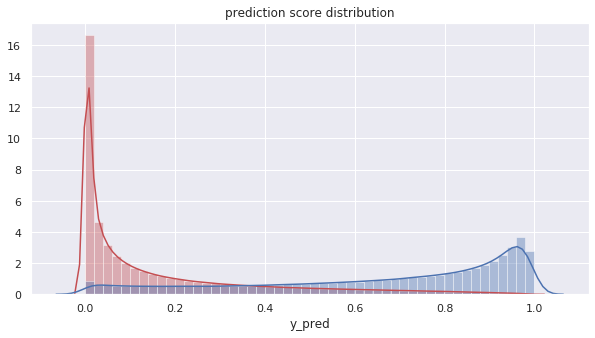

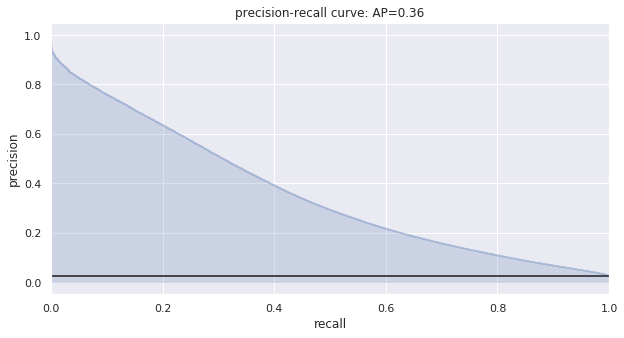

--------------------------------------------------
result dictionary save to /home/dmig/work/upsell/result/diff_ratio_result_None.pkl
save model to  /home/dmig/work/upsell/result/diff_ratio_result_None.pkl
save model to  /home/dmig/work/upsell/model/diff_ratio_model_None.pkl
ratio: 0.1
make_train_data +++
label/sample:  0.1
sample/total:  0.18491913745518526
make_data_for_modeling---
x_trn:  (2957794, 79)
x_val:  (739449, 79)
Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.902841	valid_1's auc: 0.902554
[100]	training's auc: 0.923596	valid_1's auc: 0.92295
[150]	training's auc: 0.93483	valid_1's auc: 0.933937
[200]	training's auc: 0.9411	valid_1's auc: 0.939985
[250]	training's auc: 0.945275	valid_1's auc: 0.943971
[300]	training's auc: 0.94839	valid_1's auc: 0.946869
[350]	training's auc: 0.950812	valid_1's auc: 0.949083
[400]	training's auc: 0.952413	valid_1's auc: 0.950413
[450]	training's auc: 0.953796	valid_1's auc: 0.951501
[500]	training's a

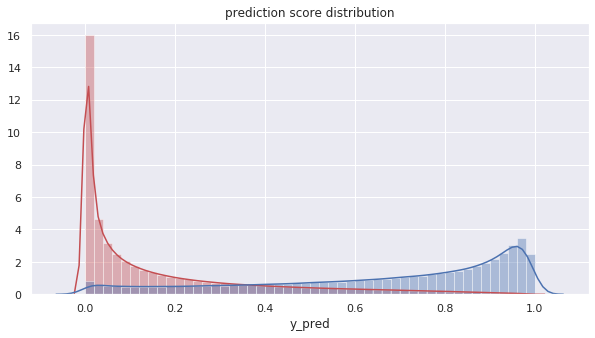

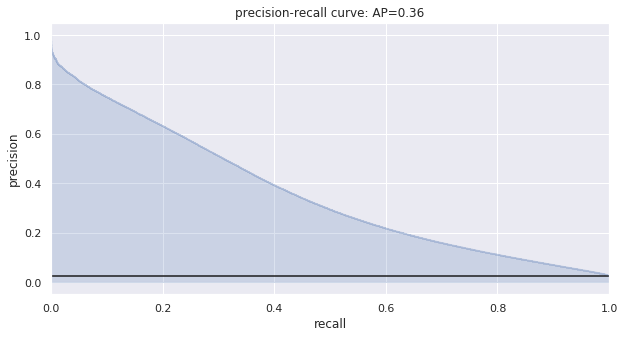

--------------------------------------------------
result dictionary save to /home/dmig/work/upsell/result/diff_ratio_result_0.1.pkl
save model to  /home/dmig/work/upsell/result/diff_ratio_result_0.1.pkl
save model to  /home/dmig/work/upsell/model/diff_ratio_model_0.1.pkl
ratio: 0.2
make_train_data +++
label/sample:  0.2
sample/total:  0.09245956872759263
make_data_for_modeling---
x_trn:  (1613342, 79)
x_val:  (403336, 79)
Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.900149	valid_1's auc: 0.89956
[100]	training's auc: 0.921438	valid_1's auc: 0.92063
[150]	training's auc: 0.933281	valid_1's auc: 0.932288
[200]	training's auc: 0.940111	valid_1's auc: 0.938881
[250]	training's auc: 0.944748	valid_1's auc: 0.943273
[300]	training's auc: 0.948102	valid_1's auc: 0.946367
[350]	training's auc: 0.950558	valid_1's auc: 0.948576
[400]	training's auc: 0.952413	valid_1's auc: 0.950138
[450]	training's auc: 0.954165	valid_1's auc: 0.951577
[500]	training's a

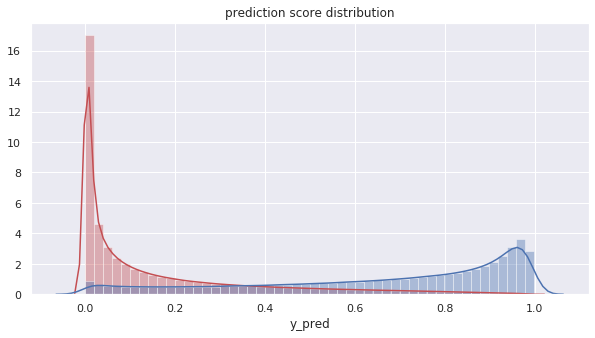

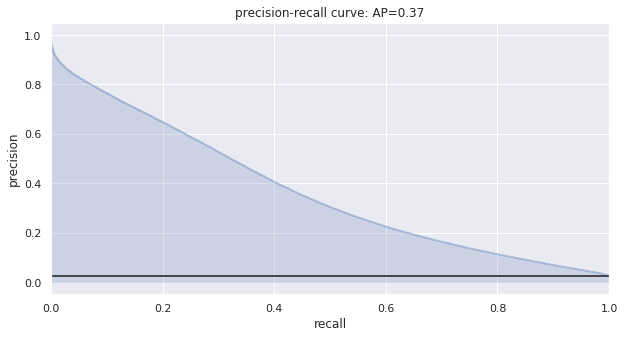

--------------------------------------------------
result dictionary save to /home/dmig/work/upsell/result/diff_ratio_result_0.2.pkl
save model to  /home/dmig/work/upsell/result/diff_ratio_result_0.2.pkl
save model to  /home/dmig/work/upsell/model/diff_ratio_model_0.2.pkl
ratio: 0.5
make_train_data +++
label/sample:  0.5
sample/total:  0.03698382749103705
make_data_for_modeling---
x_trn:  (806671, 79)
x_val:  (201668, 79)
Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.894331	valid_1's auc: 0.892668
[100]	training's auc: 0.92086	valid_1's auc: 0.91929
[150]	training's auc: 0.933602	valid_1's auc: 0.931827
[200]	training's auc: 0.940354	valid_1's auc: 0.938224
[250]	training's auc: 0.945269	valid_1's auc: 0.942813
[300]	training's auc: 0.948378	valid_1's auc: 0.945567
[350]	training's auc: 0.950922	valid_1's auc: 0.947768
[400]	training's auc: 0.952877	valid_1's auc: 0.949215
[450]	training's auc: 0.95465	valid_1's auc: 0.950597
[500]	training's auc

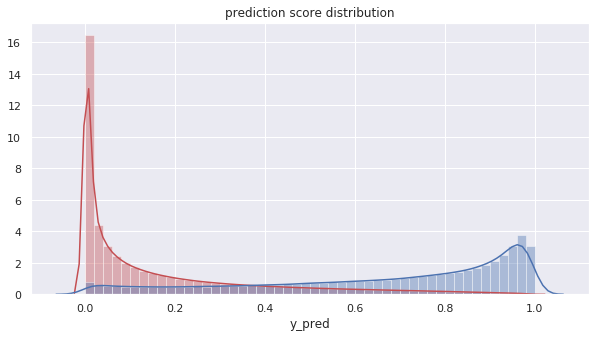

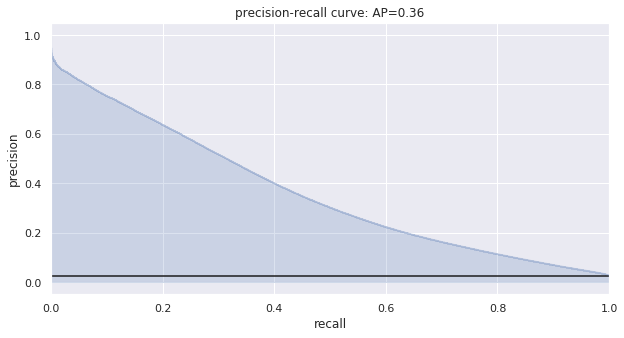

--------------------------------------------------
result dictionary save to /home/dmig/work/upsell/result/diff_ratio_result_0.5.pkl
save model to  /home/dmig/work/upsell/result/diff_ratio_result_0.5.pkl
save model to  /home/dmig/work/upsell/model/diff_ratio_model_0.5.pkl


In [10]:
result_list = []

for ratio in sample_ratio_list:
    print('ratio:', ratio)
    result = make_train_data(df_mart01, label_ratio=ratio)

    trn_idx = result['trn']['idx']
    x_trn = result['trn']['x']
    y_trn = result['trn']['y']

    val_idx = result['val']['idx']
    x_val = result['val']['x']
    y_val = result['val']['y']
    print('x_trn: ', x_trn.shape)
    print('x_val: ', x_val.shape)

    lgb_trn = lgb.Dataset(x_trn, y_trn, feature_name=feature_cols)
    lgb_val = lgb.Dataset(x_val, y_val, feature_name=feature_cols)
    
    t1 = time.time()
    clf = lgb.train(lgb_params,
                    train_set=lgb_trn,
                    valid_sets=[lgb_trn, lgb_val],
                    num_boost_round=2000,
                    early_stopping_rounds=100,
                    verbose_eval=50)
    print('elapsed time:', time.time()-t1)
    
    eval_result = evaluate(x_test, y_test.label.values, clf, clf_name='lgb', 
                           file_name='diff_ratio_result_{}.pkl'.format(str(ratio)))
    save_model(clf, 'diff_ratio_model_{}.pkl'.format(str(ratio)))
          
    result_list.append(eval_result)
          

ratio: 1.0
make_train_data +++
label/sample:  1.0
sample/total:  0.018491913745518524
make_data_for_modeling---
x_trn:  (537780, 79)
x_val:  (134446, 79)
Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.894647	valid_1's auc: 0.892348
[100]	training's auc: 0.922415	valid_1's auc: 0.920282
[150]	training's auc: 0.934229	valid_1's auc: 0.931888
[200]	training's auc: 0.941164	valid_1's auc: 0.938416
[250]	training's auc: 0.945976	valid_1's auc: 0.942793
[300]	training's auc: 0.949678	valid_1's auc: 0.946079
[350]	training's auc: 0.952407	valid_1's auc: 0.948279
[400]	training's auc: 0.954517	valid_1's auc: 0.949799
[450]	training's auc: 0.956615	valid_1's auc: 0.951399
[500]	training's auc: 0.95806	valid_1's auc: 0.952187
[550]	training's auc: 0.959197	valid_1's auc: 0.952691
[600]	training's auc: 0.9603	valid_1's auc: 0.953157
[650]	training's auc: 0.961478	valid_1's auc: 0.953714
[700]	training's auc: 0.962592	valid_1's auc: 0.954258
[750]	training's 

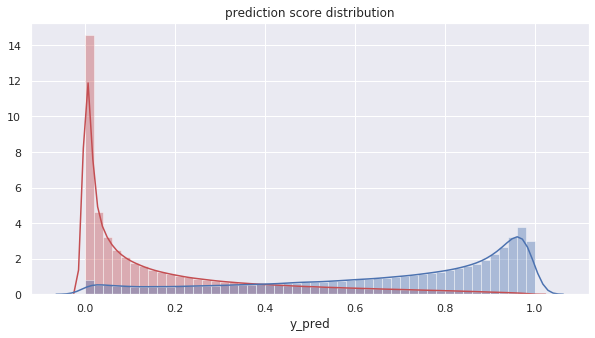

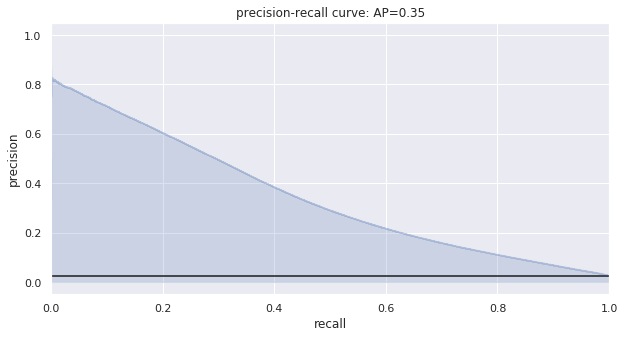

--------------------------------------------------
result dictionary save to /home/dmig/work/upsell/result/diff_ratio_result_1.0.pkl
save model to  /home/dmig/work/upsell/result/diff_ratio_result_1.0.pkl
save model to  /home/dmig/work/upsell/model/diff_ratio_model_1.0.pkl


In [18]:
ratio = 1.0

print('ratio:', ratio)
result = make_train_data(df_mart01, label_ratio=ratio)

trn_idx = result['trn']['idx']
x_trn = result['trn']['x']
y_trn = result['trn']['y']

val_idx = result['val']['idx']
x_val = result['val']['x']
y_val = result['val']['y']
print('x_trn: ', x_trn.shape)
print('x_val: ', x_val.shape)

lgb_trn = lgb.Dataset(x_trn, y_trn, feature_name=feature_cols)
lgb_val = lgb.Dataset(x_val, y_val, feature_name=feature_cols)

t1 = time.time()
clf = lgb.train(lgb_params,
                train_set=lgb_trn,
                valid_sets=[lgb_trn, lgb_val],
                num_boost_round=2000,
                early_stopping_rounds=100,
                verbose_eval=50)
print('elapsed time:', time.time()-t1)

eval_result = evaluate(x_test, y_test.label.values, clf, clf_name='lgb', 
                       file_name='diff_ratio_result_{}.pkl'.format(str(ratio)))
save_model(clf, 'diff_ratio_model_{}.pkl'.format(str(ratio)))

result_list.append(eval_result)
          

## 결론
- label ratio 별 성능 차이가 없음. 0.35~0.37
- 학습 데이터 크기가 다르므로 학습 시간은 큰 차이가 있음(4000, 740, 350, 180, 100)
- label ratio를 높일 수록 overfitting이 발생할 가능성이 보임(training auc와 valid auc의 차이)

#### label ratio를 맞추지 않고 random sampling을 하면?

In [ ]:
def sampling(df, label_col, sample_ratio=0.2):
    
    print('label/sample: ', label_ratio)
    df_tmp = df.copy()
    
    sample_idx = random.sample(list(df_tmp.index), sample_ratio))
    sample_idx = random_idx + target_idx
    print('sample/total: ', sample_cnt/df_tmp.shape[0])
    return df_tmp.loc[sample_idx,:]

In [30]:
df_sample01 =  df_mart01.sample(n=1000000, replace=False, random_state=23)

print('size: ', df_sample01.shape)
print('ratio: ', df_sample01.label.sum()/df_sample01.shape[0])
print('positive data count: ', df_sample01.label.sum())

size:  (1000000, 81)
ratio:  0.018568
positive data count:  18568


x_trn:  (800000, 79)
x_val:  (200000, 79)
Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.913565	valid_1's auc: 0.898545
[100]	training's auc: 0.934489	valid_1's auc: 0.916026
[150]	training's auc: 0.947039	valid_1's auc: 0.923356
[200]	training's auc: 0.955419	valid_1's auc: 0.927024
[250]	training's auc: 0.961605	valid_1's auc: 0.928798
[300]	training's auc: 0.966563	valid_1's auc: 0.930337
[350]	training's auc: 0.970666	valid_1's auc: 0.931247
[400]	training's auc: 0.974217	valid_1's auc: 0.932541
[450]	training's auc: 0.976932	valid_1's auc: 0.932898
[500]	training's auc: 0.979357	valid_1's auc: 0.933335
[550]	training's auc: 0.98129	valid_1's auc: 0.933413
[600]	training's auc: 0.983121	valid_1's auc: 0.933754
[650]	training's auc: 0.984615	valid_1's auc: 0.933471
[700]	training's auc: 0.985952	valid_1's auc: 0.933323
Early stopping, best iteration is:
[602]	training's auc: 0.983189	valid_1's auc: 0.933814
elapsed time: 58.932870626449585
    

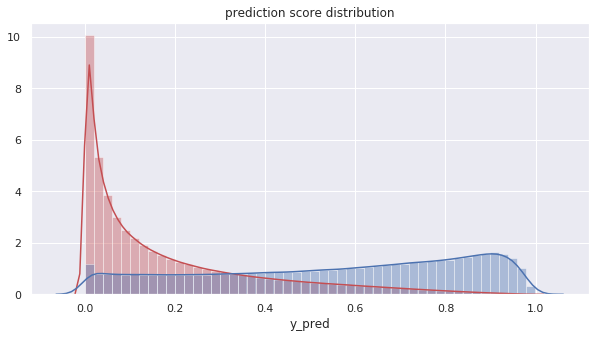

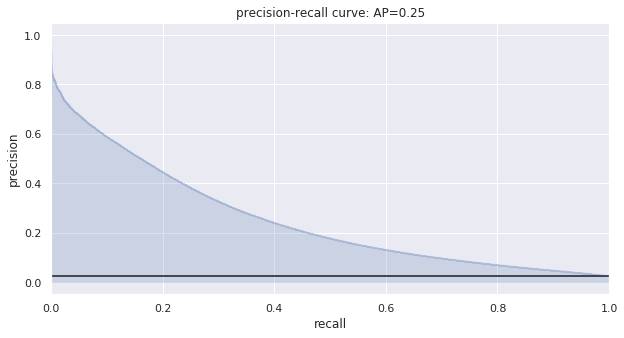

--------------------------------------------------
result dictionary save to /home/dmig/work/upsell/result/diff_ratio_result_1.0.pkl
save model to  /home/dmig/work/upsell/result/diff_ratio_result_1.0.pkl


In [29]:
# hard coding
idx_col = 'svc_mgmt_num'
target_col = 'label'
feature_cols = [col for col in df_sample01.columns if col not in [idx_col, target_col]]

# train_test_saplit
df_trn, df_val = train_test_split(df_sample01, stratify = df_sample01[target_col],
                                 test_size=0.2, random_state=23)

result = {
    'trn': {
        'idx': df_trn[[idx_col]], 
        'x': df_trn[feature_cols], 
        'y': df_trn[[target_col]]
    },
    'val': {
        'idx': df_val[[idx_col]], 
        'x': df_val[feature_cols],
        'y': df_val[[target_col]]
    }
}


trn_idx = result['trn']['idx']
x_trn = result['trn']['x']
y_trn = result['trn']['y']

val_idx = result['val']['idx']
x_val = result['val']['x']
y_val = result['val']['y']
print('x_trn: ', x_trn.shape)
print('x_val: ', x_val.shape)

lgb_trn = lgb.Dataset(x_trn, y_trn, feature_name=feature_cols)
lgb_val = lgb.Dataset(x_val, y_val, feature_name=feature_cols)

t1 = time.time()
clf = lgb.train(lgb_params,
                train_set=lgb_trn,
                valid_sets=[lgb_trn, lgb_val],
                num_boost_round=2000,
                early_stopping_rounds=100,
                verbose_eval=50)
print('elapsed time:', time.time()-t1)

eval_result = evaluate(x_test, y_test.label.values, clf, clf_name='lgb', 
                       file_name='diff_ratio_result_{}.pkl'.format(str(ratio)))

## 결론2
- random sampling(100만)을 해도 같은 성능일지 테스트
    - overfitting
    - AP는 0.25로 이전 모델들(0.35)보다 훨씬 성능이 안좋음
- 단순히 전체 데이터 사이즈가 아니라 0과 1을 구분해줄 수 있는 데이터가 필요함
    - 이전 sampling은 positive data는 40만 정도로 고정시키고 나머지 negative data를 down-sampling 했음
    - 이번 random sampling은 posiviedata가 2만명으로 모델이 학습하기에는 너무 작음
    - 때문에 train data에 overfitting 됨
- 실험 속도를 위해 훈련 데이터 사이즈는 줄여야 하고, 성능은 유지해야 함
- SMOTE smapling 등을 써도 괜찮겠으나 이미 구현한 down-sampling을 사용